In [27]:
import numpy as np
import keras
from keras import models
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import Input
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [145]:
(X_train, Y_train), (X_val, Y_val) = mnist.load_data()
x_test,y_test=X_val[:5000],Y_val[:5000]
x_val,y_val=X_val[5000:10000],Y_val[5000:10000]

In [146]:
x_test.shape

(5000, 28, 28)

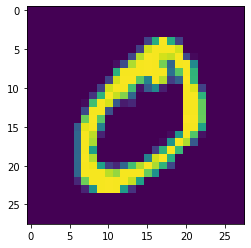

In [147]:
plt.imshow(X_train[1])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


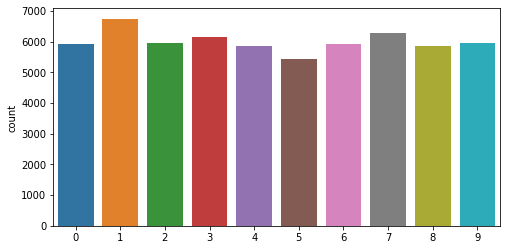

In [148]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(Y_train)
plt.show()

In [149]:
X_train = X_train/255
x_test = x_test/255

print(X_train.shape, ', ', x_test.shape)

(60000, 28, 28) ,  (5000, 28, 28)


In [150]:
X_train = X_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

X_train = X_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.reshape(-1, 28, 28, 1)

print(X_train.shape,', ',x_val.shape,', ', x_test.shape)

(60000, 28, 28, 1) ,  (5000, 28, 28, 1) ,  (5000, 28, 28, 1)


In [151]:
Y_train = to_categorical(Y_train, num_classes = 10)

#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, 
#                                                  random_state = random_seed)
y_val = to_categorical(y_val, num_classes = 10)
# y_test = to_categorical(y_val, num_classes = 10)

In [152]:
y_test=to_categorical(y_test, num_classes = 10)
y_test.shape

(5000, 10)

In [104]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = "Same", activation = "relu",
                 kernel_initializer = 'he_uniform', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = "Same", activation = "relu",
                kernel_initializer = 'he_uniform'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu",
                kernel_initializer = 'he_uniform'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu",
                kernel_initializer = 'he_uniform'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_initializer = 'he_uniform'))
model.add(Dropout(0.5))

model.add(Dense(units = 10, activation="softmax", kernel_initializer = 'he_uniform'))

In [105]:
optimizer = RMSprop(lr = 0.001, rho = 0.9, epsilon = 1e-08, decay = 0.0)
model.compile(optimizer = optimizer , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [106]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)         

In [107]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [108]:
batch_size = 128
epochs = 12
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size = batch_size),
                              epochs = epochs, validation_data = datagen.flow(x_val,y_val, batch_size = batch_size),
                              steps_per_epoch = X_train.shape[0] // batch_size,shuffle=True
                          )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/12
468/468 [==============================] - 19s 39ms/step - loss: 0.8421 - accuracy: 0.7279 - val_loss: 6.9210 - val_accuracy: 0.9860
Epoch 2/12
468/468 [==============================] - 18s 38ms/step - loss: 0.1159 - accuracy: 0.9651 - val_loss: 2.6303 - val_accuracy: 0.9928
Epoch 3/12
468/468 [==============================] - 18s 39ms/step - loss: 0.0884 - accuracy: 0.9753 - val_loss: 3.4272 - val_accuracy: 0.9932
Epoch 4/12
468/468 [==============================] - 18s 38ms/step - loss: 0.0710 - accuracy: 0.9784 - val_loss: 2.3927 - val_accuracy: 0.9948
Epoch 5/12
468/468 [==============================] - 18s 38ms/step - loss: 0.0704 - accuracy: 0.9797 - val_loss: 3.6239 - val_accuracy: 0.9930
Epoch 6/12
468/468 [==============================] - 18s 38ms/step - loss: 0.0621 - accuracy: 0.9811 - val_loss: 2.9809 - val_accuracy: 0.9938
Epoch 7/12
468/468 [==============================] - 18s 39ms/step - loss: 0.0609 - accuracy: 0.9832 - val_loss: 8.5571 - val_accuracy:

In [172]:
model.evaluate(x_test,y_test,verbose=0)

[0.023916445672512054, 0.9927999973297119]

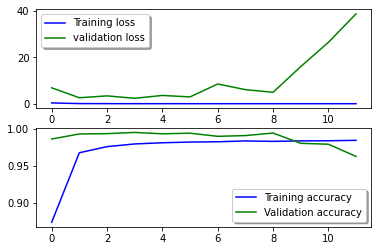

In [110]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history["loss"], color="b", label="Training loss")
ax[0].plot(history.history["val_loss"], color="g", label="validation loss", axes=ax[0])
ax[0].legend(loc="best", shadow=True)

ax[1].plot(history.history["accuracy"], color="b", label="Training accuracy")
ax[1].plot(history.history["val_accuracy"], color="g", label="Validation accuracy")
ax[1].legend(loc="best", shadow=True)

In [164]:
x_test_90=np.array(np.zeros((5000,28,28,1)),dtype=float)
for i in range(5000):
  x_test_90[i]=np.rot90(x_test[i])

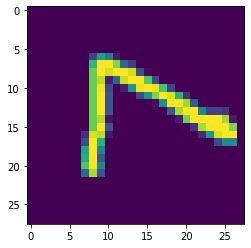

In [165]:
plt.imshow(x_test_90[0].reshape(28,28))

In [166]:
x_test_180=np.array(np.zeros((5000,28,28,1)),dtype=float)
for i in range(5000):
  x_test_180[i]=np.rot90(x_test_90[i])

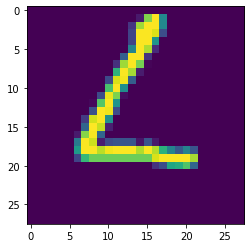

In [167]:
plt.imshow(x_test_180[0].reshape(28,28))

In [168]:
x_test_270=np.array(np.zeros((5000,28,28,1)),dtype=float)
for i in range(5000):
  x_test_270[i]=np.rot90(x_test_180[i])

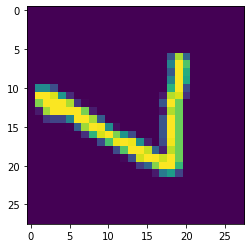

In [169]:
plt.imshow(x_test_270[0].reshape(28,28))

In [214]:
prob_90=model.predict(x_test_90)
prob_180=model.predict(x_test_180)
prob_270=model.predict(x_test_270)

In [215]:
original=x=model.predict(x_test)

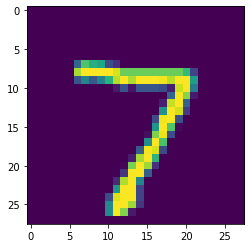

In [216]:
plt.imshow(x_test[0].reshape(28,28))

In [212]:

for i in range(10):
  if(max<x[5][i]):
    max=x[5][i]
    pos=i

In [218]:
results=np.array(np.zeros((5000,10)),dtype=float)
count=0
for i in range(5000):
  max1=-100
  pos1=-1
  for j in range(10):
    if(max1<prob_90[i][j]):
      max1=prob_90[i][j]
      pos1=i
  max2=-100
  pos2=-1
  for j in range(10):
    if(max2<prob_180[i][j]):
      ma2=prob_180[i][j]
      po2=i
  max3=-100
  pos3=-1
  for j in range(10):
    if(max3<prob_270[i][j]):
      max3=prob_270[i][j]
      pos3=i
  max=-100
  pos=-1
  for j in range(10):
    if(max<original[i][j]):
      max=original[i][j]
      pos=i
  if(max>max1 and max>max2 and max>max3):
    pass
  else:
    count+=1

In [219]:
count

644

In [221]:
1-count/5000

0.8712